In [1]:
import scanpy as sc
import decoupler as dc
import pandas as pd
import numpy as np
from loguru import logger

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')

import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

import sctk

In [2]:
infile = '/home/mowp/test/test.tsv'
df = pd.read_csv(infile, sep='\t', index_col=0)

In [3]:
df = df.corr()

In [4]:
df

,B_01_MS4A1,B_02_MS4A1_CD83,B_03_MZB1,B_04_STMN1,CD4T_02_SELL,CD4T_03_GPR183,CD4T_04_BAG3,CD4T_05_CD69,CD4T_06_PLCG2,CD4T_07_CXCL13,...,Neu_08_CD74,Neu_09_IFIT1,Neu_10_SPP1,Neu_11_CCL4,NK_02_FCGR3A_CXCR4,NK_03_FCGR3A_IFNG,NK_04_PLCG2,NK_05_CD160,NK_06_ITGA1,NK_07_STMN1
B_01_MS4A1,1.000000,0.094068,0.011325,0.013454,0.085284,-0.078577,-0.023723,-0.052906,0.432634,0.024927,...,-0.003809,-0.005794,-0.035478,-0.010636,-0.087999,-0.034360,0.363774,-0.069208,-0.030095,-0.004601
B_02_MS4A1_CD83,0.094068,1.000000,0.104781,0.165587,0.389173,0.145494,-0.100055,0.098459,-0.045724,0.197061,...,-0.033377,0.002388,-0.098587,0.004492,-0.169931,-0.080159,-0.071682,-0.063824,-0.117187,-0.132913
B_03_MZB1,0.011325,0.104781,1.000000,0.865294,-0.031310,-0.060378,-0.071235,0.003172,-0.053282,0.576494,...,0.033698,-0.013136,-0.056835,-0.012744,-0.187648,-0.074981,-0.060372,-0.076928,-0.095329,-0.009794
B_04_STMN1,0.013454,0.165587,0.865294,1.000000,0.060391,-0.068077,-0.071194,0.007738,-0.051166,0.491942,...,-0.000821,-0.063021,-0.075484,-0.048927,-0.160619,-0.065193,-0.060598,-0.045907,-0.091135,0.063024
CD4T_02_SELL,0.085284,0.389173,-0.031310,0.060391,1.000000,-0.060930,-0.026308,0.008229,0.135041,0.119679,...,-0.013253,-0.035426,-0.023250,-0.024699,-0.101922,-0.011326,-0.018357,-0.053237,-0.033752,-0.084832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NK_03_FCGR3A_IFNG,-0.034360,-0.080159,-0.074981,-0.065193,-0.011326,-0.134829,0.033703,0.072500,-0.018702,-0.048298,...,-0.029068,-0.061643,-0.041340,-0.051219,0.015899,1.000000,0.191668,0.117489,-0.042643,0.200830
NK_04_PLCG2,0.363774,-0.071682,-0.060372,-0.060598,-0.018357,-0.148346,0.002180,-0.056985,0.367633,-0.065252,...,-0.023553,-0.077307,-0.078508,-0.064169,0.146034,0.191668,1.000000,0.120672,-0.010426,0.304185
NK_05_CD160,-0.069208,-0.063824,-0.076928,-0.045907,-0.053237,-0.009756,-0.133142,0.011085,-0.164435,-0.129478,...,-0.049610,-0.151544,-0.120774,-0.103047,0.327483,0.117489,0.120672,1.000000,-0.121102,0.577544
NK_06_ITGA1,-0.030095,-0.117187,-0.095329,-0.091135,-0.033752,-0.097366,0.467128,-0.125444,0.282818,-0.083081,...,-0.037028,0.081253,0.175093,0.090716,-0.172936,-0.042643,-0.010426,-0.121102,1.000000,0.345627


In [5]:
clustermap = sctk.tl.ClusterMap(df)

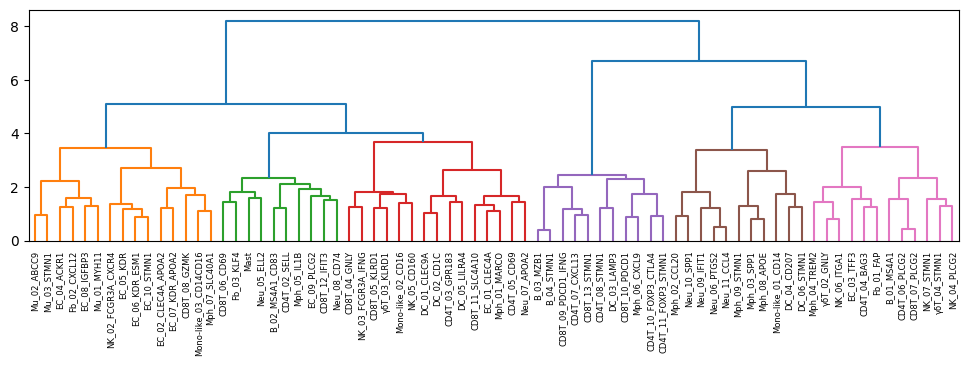

In [6]:
clustermap.get_clusters(threshold=.45)

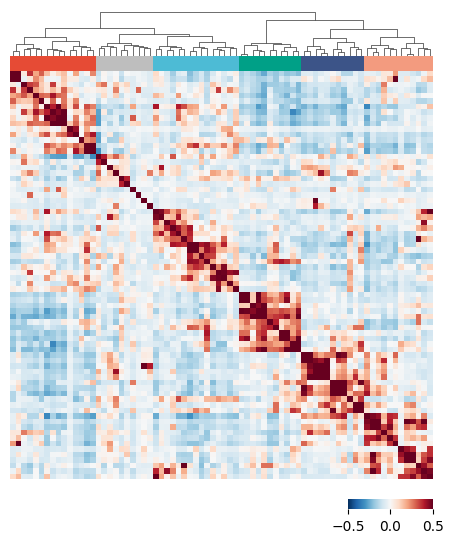

In [7]:
clustermap.plot(
    vmax=.5, vmin=-.5, 
    cluster_pal = ['#e64b35', '#bebebe', '#4dbbd5', '#00a087', '#3c5488', '#f39b7f'])

In [8]:
clustermap.show_clusters()

{'C0': ['Mu_02_ABCC9',
  'Mu_03_STMN1',
  'EC_04_ACKR1',
  'Fb_02_CXCL12',
  'EC_08_IGFBP3',
  'Mu_01_MYH11',
  'NK_02_FCGR3A_CXCR4',
  'EC_05_KDR',
  'EC_06_KDR_ESM1',
  'EC_10_STMN1',
  'EC_02_CLEC4A_APOA2',
  'EC_07_KDR_APOA2',
  'CD8T_08_GZMK',
  'Mono-like_03_CD14CD16',
  'Mph_07_SLC40A1'],
 'C1': ['CD8T_06_CD69',
  'Fb_03_KLF4',
  'Mast',
  'Neu_05_ELL2',
  'B_02_MS4A1_CD83',
  'CD4T_02_SELL',
  'Mph_05_IL1B',
  'EC_09_PLCG2',
  'CD8T_12_IFIT3',
  'Neu_08_CD74'],
 'C2': ['CD8T_04_GNLY',
  'NK_03_FCGR3A_IFNG',
  'CD8T_05_KLRD1',
  'γδT_03_KLRD1',
  'Mono-like_02_CD16',
  'NK_05_CD160',
  'DC_01_CLEC9A',
  'DC_02_CD1C',
  'CD4T_03_GPR183',
  'DC_05_LILRA4',
  'CD8T_11_SLC4A10',
  'EC_01_CLEC4A',
  'Mph_01_MARCO',
  'CD4T_05_CD69',
  'Neu_07_APOA2'],
 'C3': ['B_03_MZB1',
  'B_04_STMN1',
  'CD8T_09_PDCD1_IFNG',
  'CD4T_07_CXCL13',
  'CD8T_13_STMN1',
  'CD4T_08_STMN1',
  'DC_03_LAMP3',
  'CD8T_10_PDCD1',
  'Mph_06_CXCL9',
  'CD4T_10_FOXP3_CTLA4',
  'CD4T_11_FOXP3_STMN1'],
 'C4': ['Mph